In [2]:
import numpy as np
from System_backend import *
import matplotlib.pyplot as plt
import ellipse as ell
import tqdm
%matplotlib widget
plt.rcParams["figure.figsize"] = (4,3)

In [30]:
ell_tot = 2000.
distance_anchor = 1000.
rho0 = 0.0001
temperature = 0.15
tau_0 = np.exp(1/temperature)
print(r'$\tau_0 = $'+str(tau_0))
S = System(ell_tot,distance_anchor,rho0,temperature)

$\tau_0 = $785.7719942274175


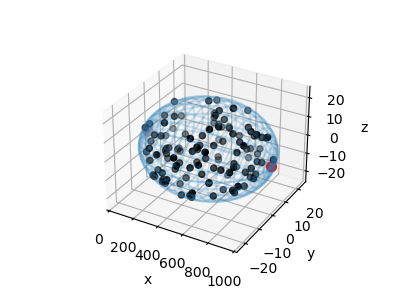

In [31]:
plt.close()
fig,ax = S.Plot3DSystem()
plt.show()

In [32]:
time_tot = 10000
Ells = np.zeros(time_tot,dtype=float)
Ns = np.zeros(time_tot,dtype=float)
time_bind = list()
time_ub = list()
time = np.zeros(time_tot,dtype=float)
for t in tqdm.tqdm(range(time_tot)):
    bind, dt = S.evolve()
#    for n,ell in enumerate(S.get_ell()):
#        if ell<np.linalg.norm(S.get_R()[n+1]-S.get_R()[n]):
#            print(bind)
#            print(S.get_ell())
#            print(S.get_R())
#            for n,ell in enumerate(S.get_ell()):
#                print(np.linalg.norm(S.get_R()[n+1]-S.get_R()[n]))
#            raise SystemExit('error in code want to exit')
    R = S.get_R()       
    r = S.get_r()
    if bind :
        time_bind.append(dt)
    else:
        time_ub.append(dt)
    if t!=0:
        time[t]= time[t-1]+dt
    else:
        time[t] = dt
    Ells[t] = np.mean(S.get_ell())
    Ns[t] = S.get_N_loop()

100%|███████████████████████████████████| 10000/10000 [00:07<00:00, 1365.39it/s]


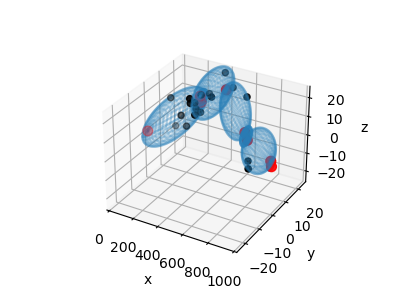

In [36]:
plt.close()
fig,ax = S.Plot3DSystem()
plt.show()

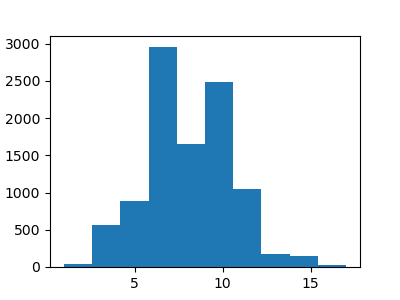

In [34]:
plt.close()
plt.hist(Ns)
plt.show()

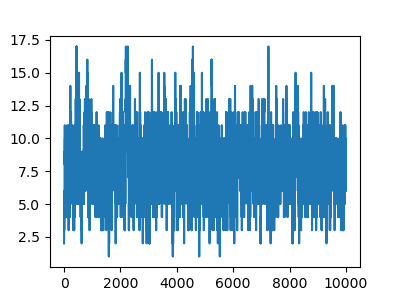

In [35]:
plt.close()
fig,ax = plt.subplots()
#lt.plot(np.arange(0,time_tot,1),time/tau_0)
plt.plot(np.arange(0,time_tot,1),Ns)
#plt.hist(time_bind,bins=100)
#plt.yscale('log')
#plt.xscale('log')
plt.show()